In [37]:
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("/Users/adr/Box/CAR_Tcells/Data/DREAMdata/all_cl_time_aligned.csv")

In [3]:
data

,treatment,cell_line,time,cellID,fileID,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,...,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5,time_course
0,EGF,HCC1428,0.0,1,29,2.277863,1.577461,2.515730,2.965038,6.90317,...,4.419839,3.26107,7.03802,2.462533,1.597266,3.838360,4.049111,0.652426,3.305500,A
1,EGF,HCC1428,0.0,1,95,0.829853,1.953114,2.446810,3.426870,6.80673,...,3.198912,3.98929,3.41358,2.541979,2.594581,2.234090,2.796784,2.005433,3.396518,B
2,EGF,HCC1428,0.0,2,29,1.746819,3.045100,1.635950,2.459020,6.06703,...,2.809153,2.21759,3.31012,0.331558,1.669024,3.150189,3.229133,0.652426,3.241775,A
3,EGF,HCC1428,0.0,2,95,1.845799,3.538038,3.041430,2.508841,5.71532,...,3.177542,2.81194,7.28994,1.817634,2.223754,2.449400,3.094784,2.137521,3.303891,B
4,EGF,HCC1428,0.0,3,29,0.739657,3.386717,1.574390,3.104396,6.20346,...,2.596193,5.30232,4.63872,2.318320,2.303349,2.829673,2.343361,0.652426,2.180254,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23131339,iPKC,T47D,60.0,3885,4444,0.796624,2.817705,2.708316,2.649728,5.30164,...,2.408345,2.71991,6.08711,1.649240,2.360670,2.825340,3.027605,2.544341,2.909578,B
23131340,iPKC,T47D,60.0,3886,4444,2.080326,3.073579,2.283993,4.164062,4.36651,...,3.454036,1.65488,8.32390,1.800680,2.093250,2.999610,3.747098,1.558878,2.663090,B
23131341,iPKC,T47D,60.0,3887,4444,0.796624,3.327099,2.626595,2.826593,5.32818,...,3.095702,2.12746,7.71649,2.712010,1.918540,2.640700,3.471636,2.576593,3.053585,B
23131342,iPKC,T47D,60.0,3888,4444,0.796624,2.488476,2.830036,3.098706,5.44272,...,2.801503,1.65488,7.86357,2.232220,2.026130,2.833090,3.484447,0.576076,2.616188,B


In [4]:
data["time"].unique()

array([ 0. ,  5.5,  7. ,  9. , 13. , 17. , 23. , 30. , 40. , 60. ])

In [5]:
ident_cols = ["treatment", "cell_line", "time", "cellID", "fileID", "time_course"]
group_cols = ["treatment", "cell_line", "time"]
markers = [c for c in data.columns if not c in ident_cols]

In [6]:
avg_data = data.groupby(group_cols).mean()[markers].reset_index(drop=False)
plt_data = avg_data.melt(id_vars=group_cols, value_vars=markers, value_name="Expression", var_name="Marker")
plt_data

/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_23126/2196023352.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_data = data.groupby(group_cols).mean()[markers].reset_index(drop=False)


,treatment,cell_line,time,Marker,Expression
0,EGF,184A1,0.0,b.CATENIN,1.196279
1,EGF,184A1,5.5,b.CATENIN,1.061006
2,EGF,184A1,7.0,b.CATENIN,1.066766
3,EGF,184A1,9.0,b.CATENIN,1.247629
4,EGF,184A1,13.0,b.CATENIN,1.153863
...,...,...,...,...,...
85983,iPKC,ZR7530,9.0,p.STAT5,2.896443
85984,iPKC,ZR7530,13.0,p.STAT5,2.886725
85985,iPKC,ZR7530,17.0,p.STAT5,2.744360
85986,iPKC,ZR7530,40.0,p.STAT5,2.783426


<AxesSubplot: xlabel='time', ylabel='Expression'>

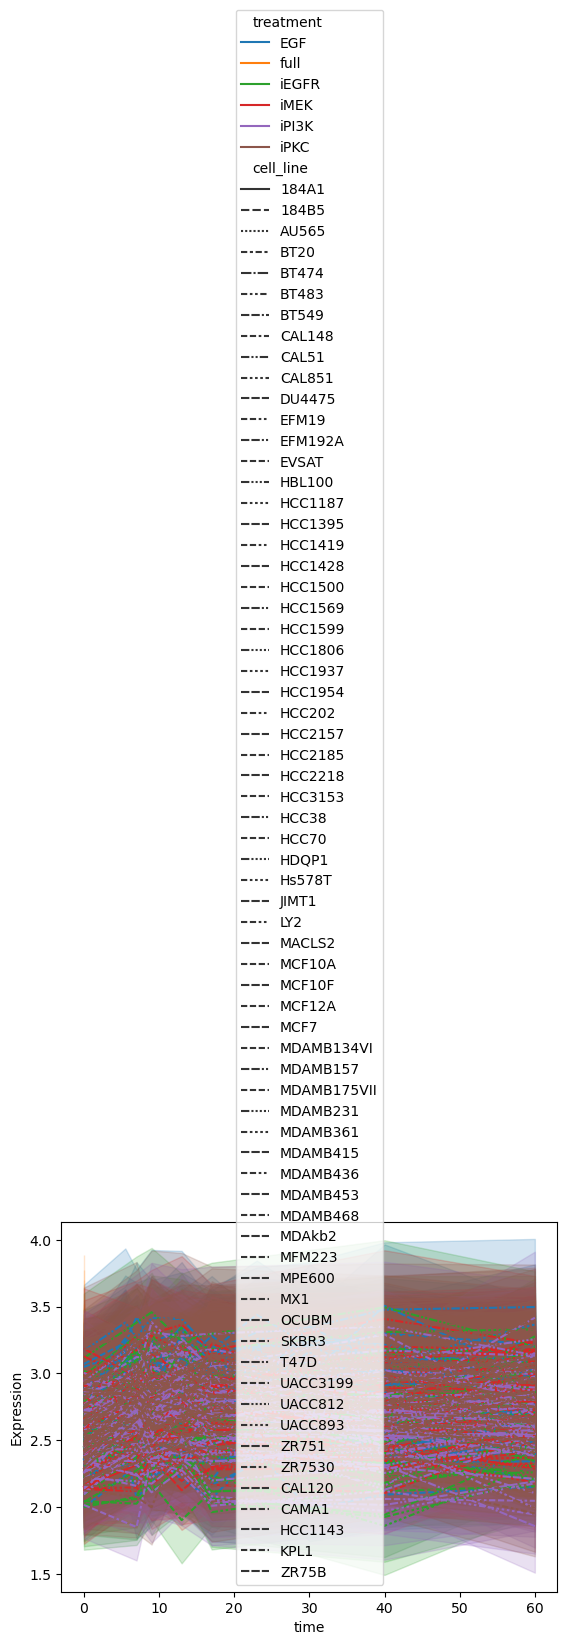

In [7]:
sns.lineplot(data=plt_data, x="time", y="Expression", hue="treatment", style="cell_line")

<AxesSubplot: xlabel='time', ylabel='Expression'>

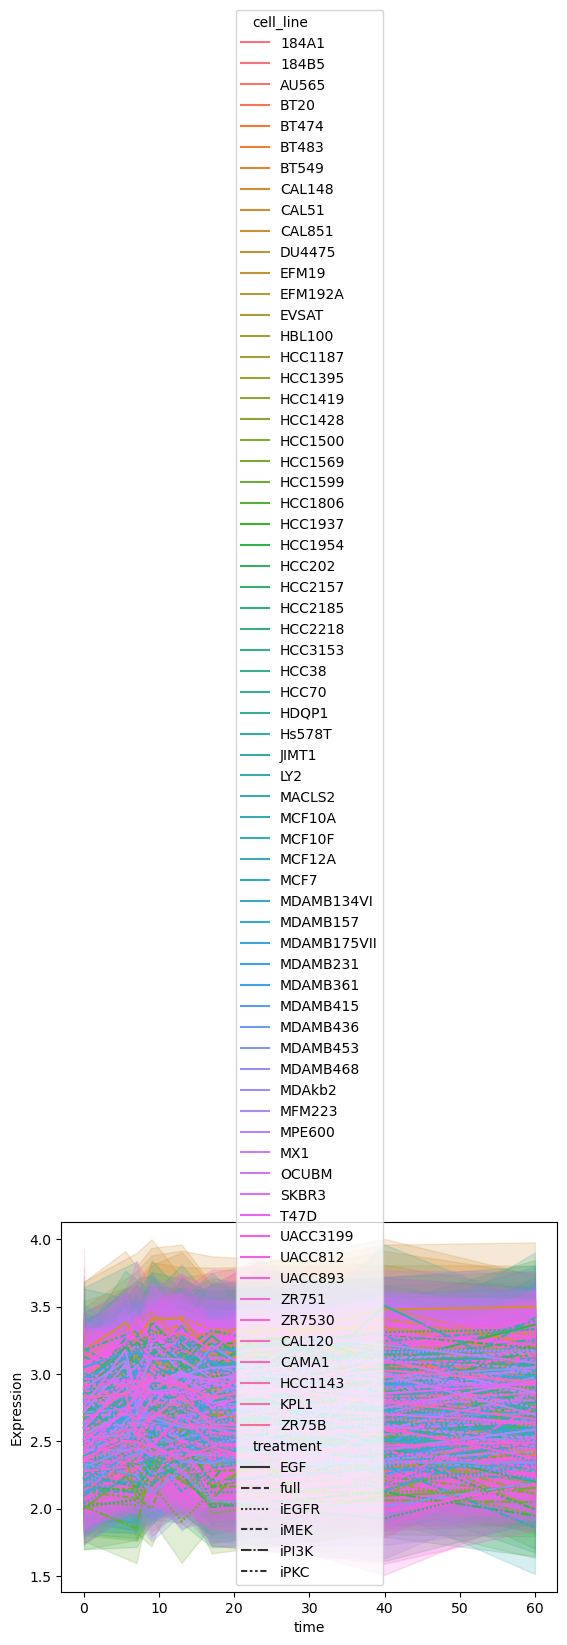

In [8]:
sns.lineplot(data=plt_data, x="time", y="Expression", hue="cell_line", style="treatment")

<AxesSubplot: xlabel='time', ylabel='Expression'>

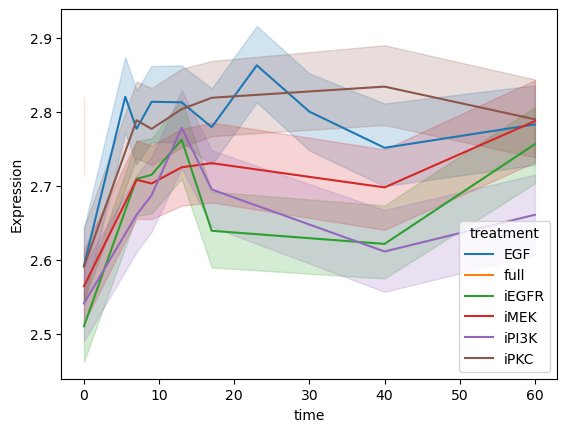

In [9]:
sns.lineplot(data=plt_data, x="time", y="Expression", hue="treatment")

<AxesSubplot: xlabel='time', ylabel='Expression'>

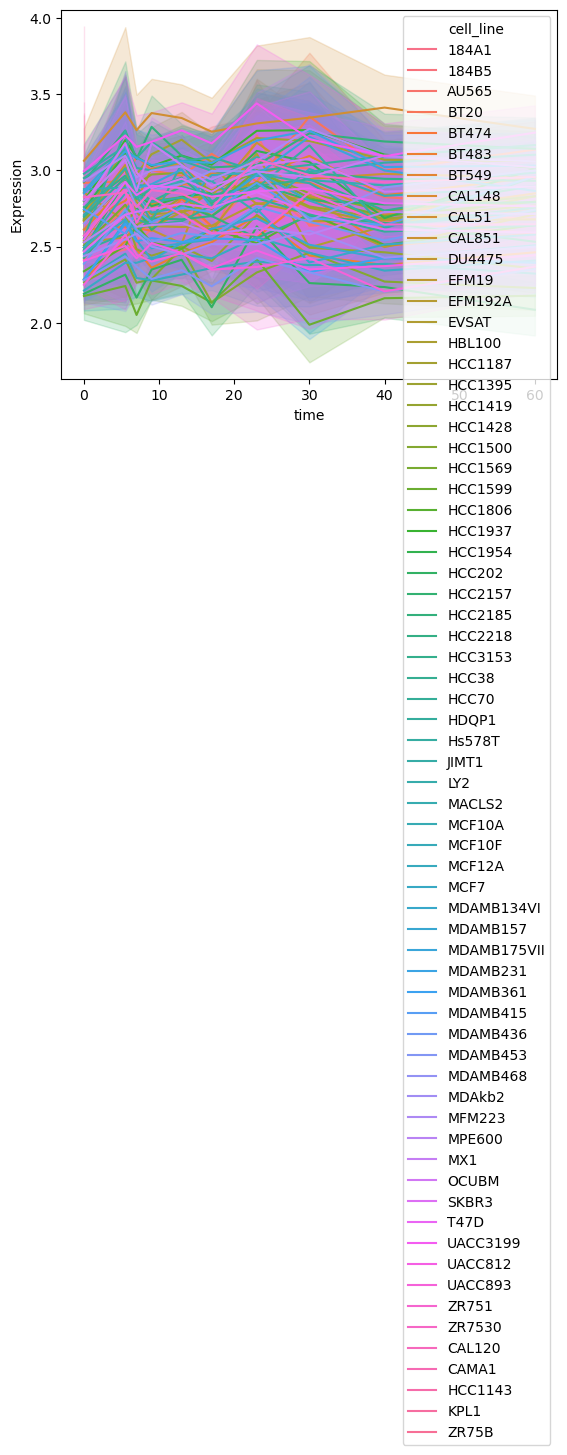

In [10]:
sns.lineplot(data=plt_data, x="time", y="Expression", hue="cell_line")

# 

In [26]:
temp = data.groupby(["time", "treatment", "cell_line"]).size().reset_index(drop=False)#[data.groupby(["time", "treatment", "cell_line"]).size().reset_index(drop=False)["time"].isin([9.0, 13.0])]
temp

,time,treatment,cell_line,0
0,0.0,EGF,184A1,15512
1,0.0,EGF,184B5,15760
2,0.0,EGF,AU565,15120
3,0.0,EGF,BT20,18525
4,0.0,EGF,BT474,16048
...,...,...,...,...
2319,60.0,iPKC,UACC3199,6164
2320,60.0,iPKC,UACC812,5664
2321,60.0,iPKC,UACC893,7513
2322,60.0,iPKC,ZR751,5754


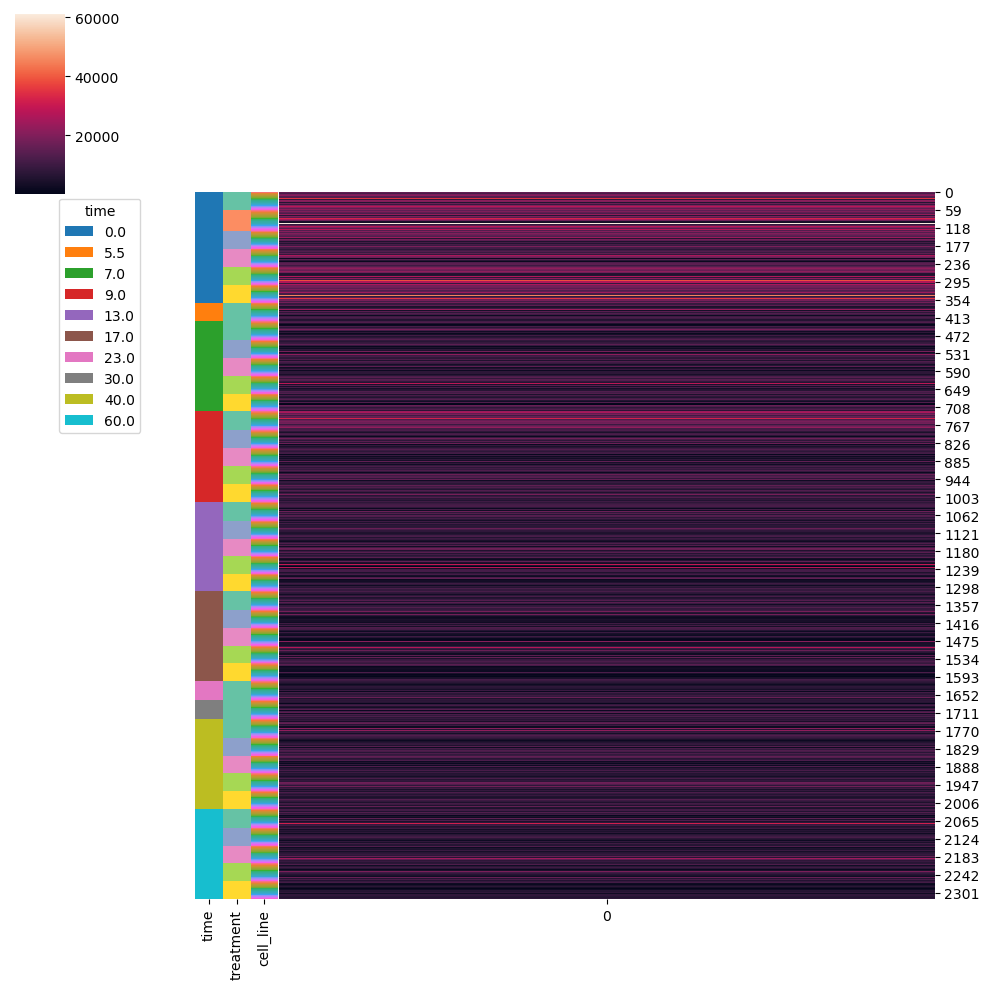

In [36]:
lut = dict(zip(temp["time"].unique(), sns.color_palette()))
row_colors1 = temp["time"].map(lut)

lut2 = dict(zip(temp["treatment"].unique(), sns.color_palette("Set2")))
row_colors2 = temp["treatment"].map(lut2)

lut3 = dict(zip(temp["cell_line"].unique(), sns.color_palette("husl", len(temp["cell_line"].unique()))))
row_colors3 = temp["cell_line"].map(lut3)

row_colors = pd.concat([row_colors1, row_colors2, row_colors3], axis=1)

g = sns.clustermap(temp[0], row_cluster=False, col_cluster=False, row_colors=row_colors)

handles = [Patch(facecolor=lut[name]) for name in lut]
l=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.2,1), handles=handles, labels=lut.keys())
l.set_title(title='time',prop={'size':10})

# handles = [Patch(facecolor=lut2[name]) for name in lut2]
# l2=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.1,1), handles=handles, labels=lut2.keys())
# l2.set_title(title='treatment',prop={'size':10})

# handles = [Patch(facecolor=lut3[name]) for name in lut3]
# l3=g.ax_heatmap.legend(loc='upper right',bbox_to_anchor=(-0.1,1), handles=handles, labels=lut3.keys())
# l3.set_title(title='cell_line',prop={'size':10})

In [25]:
data.groupby(["time", "time_course"]).size().reset_index(drop=False)

,time,time_course,0
0,0.0,A,3077573
1,0.0,B,2938332
2,5.5,A,606337
3,7.0,B,2556257
4,9.0,A,2684946
5,9.0,B,533453
6,13.0,A,2592075
7,13.0,B,7075
8,17.0,A,22917
9,17.0,B,2384104


# Marker distrubions

In [ ]:
def fit_distribution(df, column,pct,pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standarise(column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [32]:
data.describe()

,time,cellID,fileID,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,...,p.PDPK1,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5
count,2.313134e+07,2.313134e+07,2.313134e+07,2.313134e+07,2.313134e+07,2.313134e+07,2.313134e+07,2.313134e+07,2.313134e+07,2.313134e+07,...,2.313134e+07,2.088306e+07,2.313134e+07,2.313134e+07,2.313134e+07,2.313134e+07,2.313134e+07,2.313134e+07,2.313134e+07,2.313134e+07
mean,1.649711e+01,5.169244e+03,2.250885e+03,9.381181e-01,2.188964e+00,2.376788e+00,2.488174e+00,6.653035e+00,3.179063e+00,2.738395e+00,...,1.780618e+00,2.441114e+00,4.025667e+00,5.479721e+00,2.061020e+00,1.778971e+00,2.232728e+00,2.808812e+00,1.874197e+00,2.389825e+00
std,1.823909e+01,4.043513e+03,1.292248e+03,6.240145e-01,1.033417e+00,1.234259e+00,1.037368e+00,2.470796e+00,1.364623e+00,1.154012e+00,...,9.231488e-01,1.216028e+00,1.733904e+00,1.685312e+00,8.666302e-01,8.536611e-01,9.802171e-01,9.084233e-01,1.110936e+00,7.691973e-01
min,0.000000e+00,1.000000e+00,5.000000e+00,2.247840e-01,3.062290e-01,7.331870e-01,4.390360e-01,4.250200e+00,1.022150e+00,6.379140e-01,...,1.366320e-01,3.580410e-01,1.654880e+00,1.906840e+00,-1.418500e-03,-1.530900e-02,-9.283753e-02,-3.411812e-01,3.230540e-01,-5.773930e-01
25%,0.000000e+00,2.043000e+03,1.122000e+03,4.262580e-01,1.356082e+00,1.366983e+00,1.762812e+00,5.011630e+00,1.908570e+00,1.862515e+00,...,1.023549e+00,1.392048e+00,2.555860e+00,4.181010e+00,1.507622e+00,1.110382e+00,1.551760e+00,2.277680e+00,9.059680e-01,1.945870e+00
50%,9.000000e+00,4.346000e+03,2.347000e+03,7.966240e-01,2.215890e+00,2.114240e+00,2.550702e+00,5.855680e+00,3.069360e+00,2.809672e+00,...,1.789800e+00,2.354444e+00,3.523760e+00,5.643560e+00,2.155759e+00,1.838827e+00,2.286059e+00,2.855380e+00,1.751059e+00,2.449150e+00
75%,1.700000e+01,7.345000e+03,3.351000e+03,1.294969e+00,2.892644e+00,2.898310e+00,3.241664e+00,6.798460e+00,4.224910e+00,3.586949e+00,...,2.442960e+00,3.328129e+00,5.324010e+00,6.835880e+00,2.687470e+00,2.418643e+00,2.929869e+00,3.382834e+00,2.546313e+00,2.908931e+00
max,6.000000e+01,3.481900e+04,4.464000e+03,1.704403e+01,1.024935e+01,1.003602e+01,7.778909e+00,1.442235e+01,8.582670e+00,8.390529e+00,...,6.869669e+00,9.465811e+00,1.087191e+01,1.264000e+01,8.202345e+00,9.910373e+00,1.047336e+01,9.287139e+00,8.873632e+00,9.566830e+00


In [39]:
scaler = MinMaxScaler()
norm_data = data.copy()
norm_data[markers] = scaler.fit_transform(data[markers])
norm_data.describe()

KeyboardInterrupt: 